In [885]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [886]:
df=pd.read_csv('IBM-HR-Attrition.csv')

In [887]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [888]:
df.shape

(1470, 35)

In [889]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [890]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


skewness present in Distance from home,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearsWithCurrManager.
outliers are present in DailyRate,DistanceFromHome,EmployeeNumber and YearsAtCompany.

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [892]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [893]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null values.

We need to change String columns into Numerical Values.

In [894]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

we need to change string variable into numerical value.

In [895]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])

df['Over18']=le.fit_transform(df['Over18'])
df['OverTime']=le.fit_transform(df['OverTime'])

df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])



In [896]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [897]:
df_cor=df.corr()
df_cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Attrition is highly correlate with overtime and least corelate with jobInvolvement,joblevel,jobsatisfaction and monthlyincome.

In [898]:
df['MaritalStatus']

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int32

<AxesSubplot:>

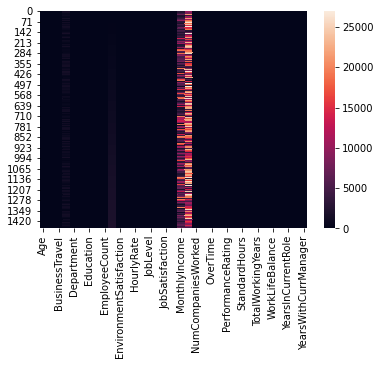

In [899]:
sns.heatmap(df)

<AxesSubplot:>

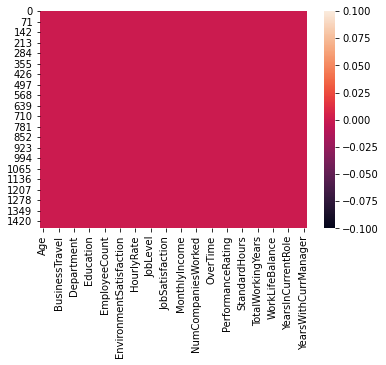

In [900]:
sns.heatmap(df.isnull())

No Null Values.

<AxesSubplot:>

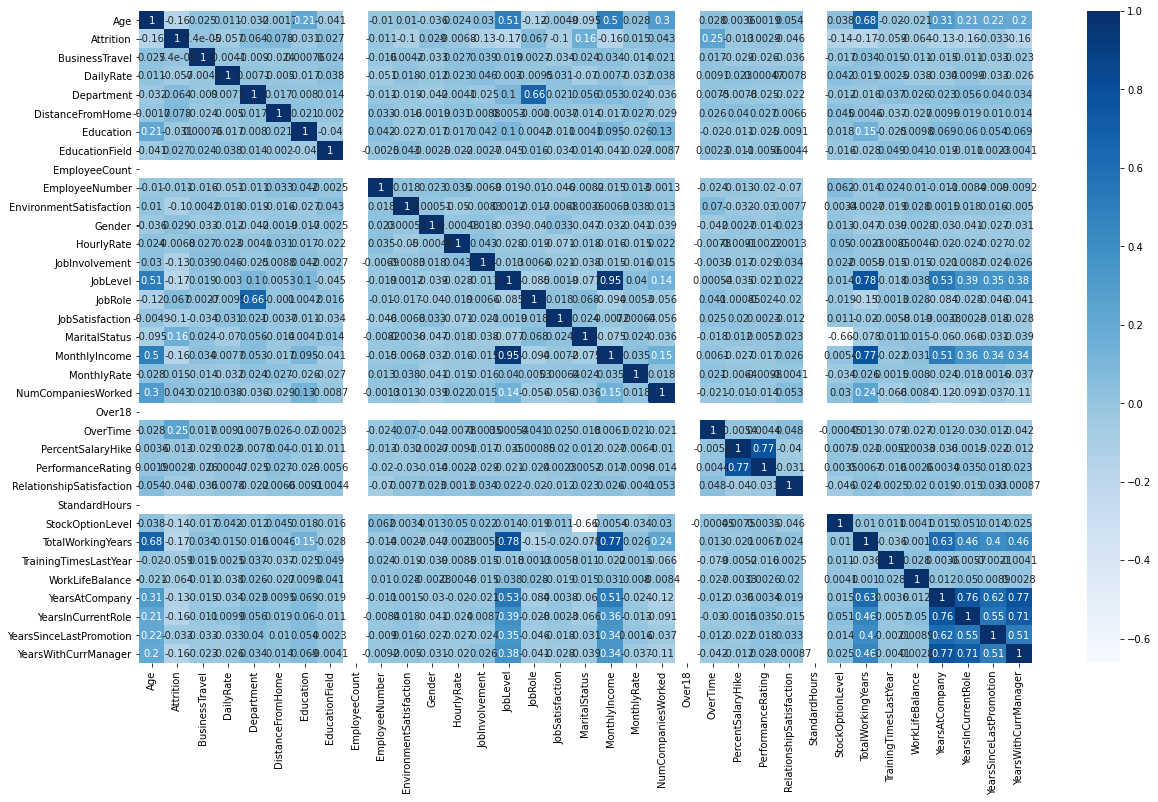

In [901]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Attrition is highly correlate with overtime and least corelate with jobInvolvement,joblevel,jobsatisfaction and monthlyincome.

<AxesSubplot:>

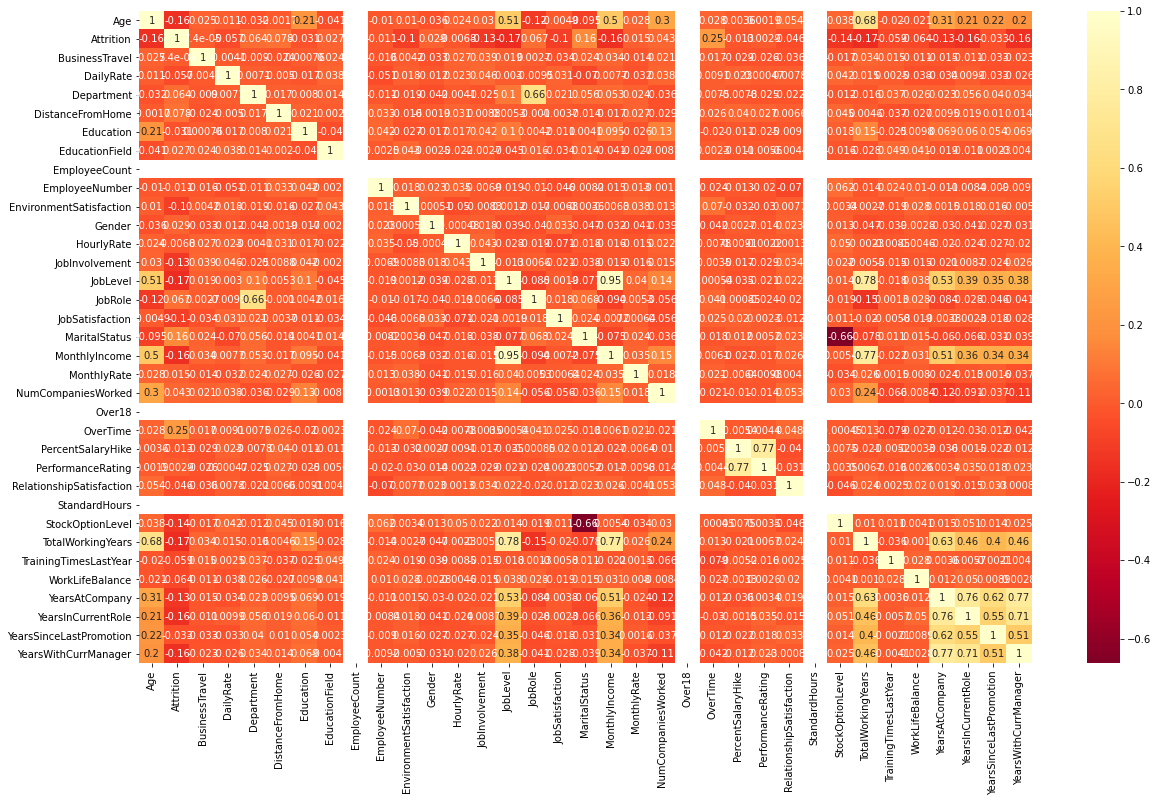

In [902]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Attrition is highly correlate with overtime and least corelate with jobInvolvement,joblevel,jobsatisfaction and monthlyincome.

In [903]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

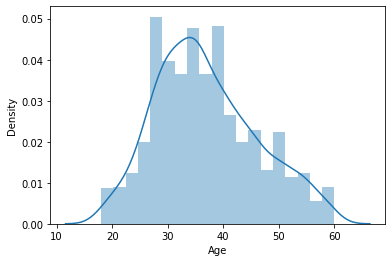

In [904]:
sns.distplot(df['Age'])

No skewness present.

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

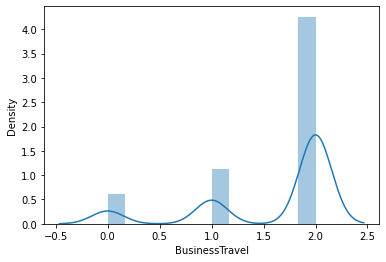

In [905]:
sns.distplot(df['BusinessTravel'])

skewness present.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

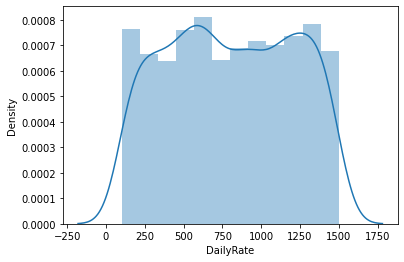

In [906]:
sns.distplot(df['DailyRate'])

No skewness present.

<AxesSubplot:xlabel='Department', ylabel='Density'>

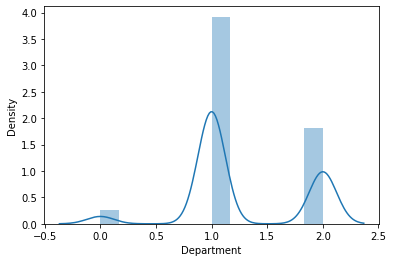

In [907]:
sns.distplot(df['Department'])

No skewness present.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

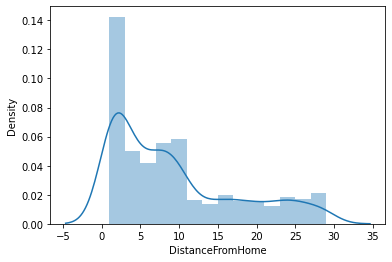

In [908]:
sns.distplot(df['DistanceFromHome'])

skewness present.

<AxesSubplot:xlabel='Education', ylabel='Density'>

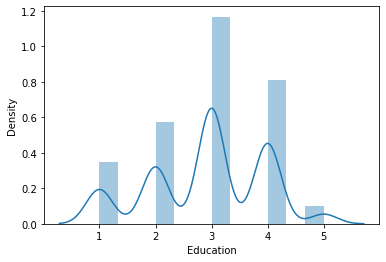

In [909]:
sns.distplot(df['Education'])

No skewness present.

<AxesSubplot:xlabel='EducationField', ylabel='Density'>

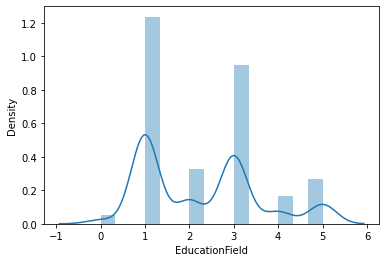

In [910]:
sns.distplot(df['EducationField'])

No skewness present.

<AxesSubplot:xlabel='EmployeeCount', ylabel='Density'>

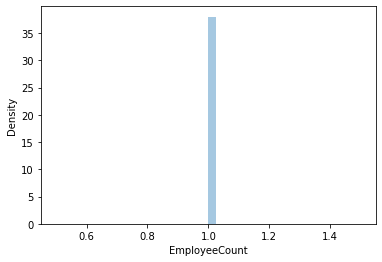

In [911]:
sns.distplot(df['EmployeeCount'])

No skewness present.

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

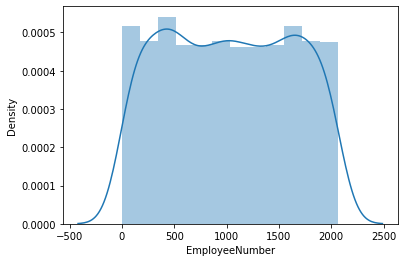

In [912]:
sns.distplot(df['EmployeeNumber'])

No skewness present.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

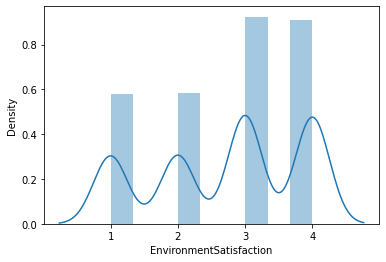

In [913]:
sns.distplot(df['EnvironmentSatisfaction'])

No skewness present.

<AxesSubplot:xlabel='Gender', ylabel='Density'>

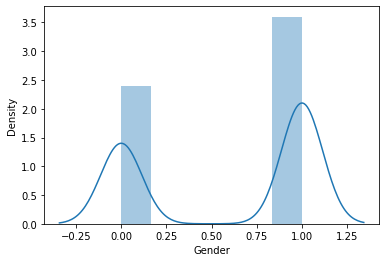

In [914]:
sns.distplot(df['Gender'])

No skewness present.

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

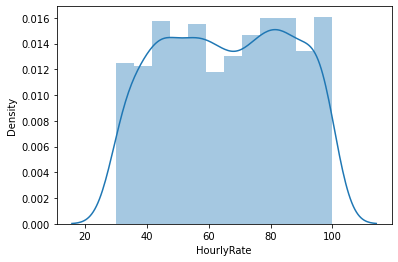

In [915]:
sns.distplot(df['HourlyRate'])

No skewness present.

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

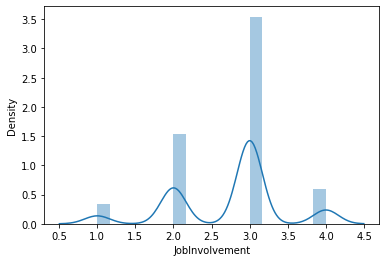

In [916]:
sns.distplot(df['JobInvolvement'])

No skewness present.

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

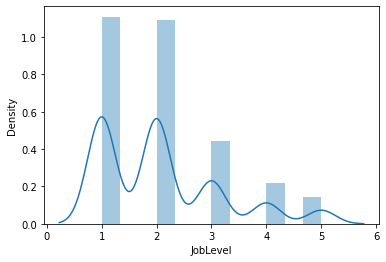

In [917]:
sns.distplot(df['JobLevel'])

skewness present.

<AxesSubplot:xlabel='JobRole', ylabel='Density'>

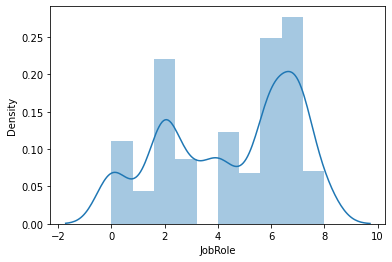

In [918]:
sns.distplot(df['JobRole'])

No skewness present.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

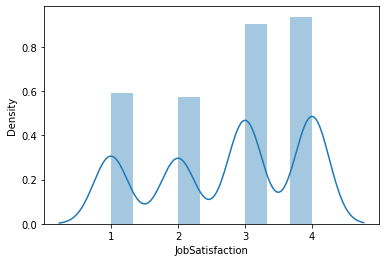

In [919]:
sns.distplot(df['JobSatisfaction'])

No skewness present.

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

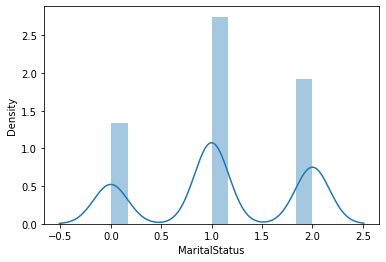

In [920]:
sns.distplot(df['MaritalStatus'])

No skewness present.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

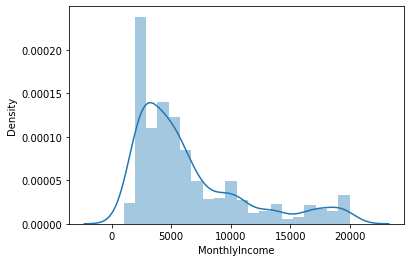

In [921]:
sns.distplot(df['MonthlyIncome'])

skewness present.

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

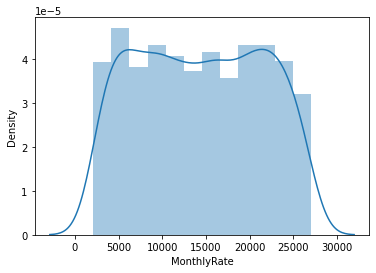

In [922]:
sns.distplot(df['MonthlyRate'])

No skewness present.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

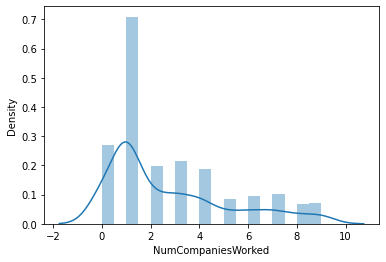

In [923]:
sns.distplot(df['NumCompaniesWorked'])

skewness present.

<AxesSubplot:xlabel='Over18', ylabel='Density'>

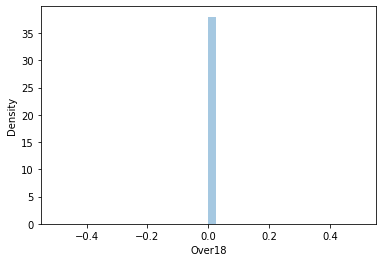

In [924]:
sns.distplot(df['Over18'])

No skewness present.

<AxesSubplot:xlabel='OverTime', ylabel='Density'>

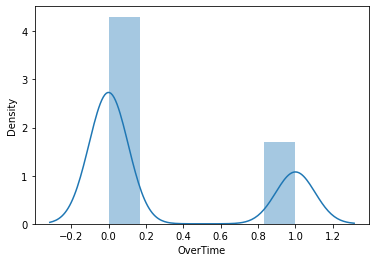

In [925]:
sns.distplot(df['OverTime'])

skewness present.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

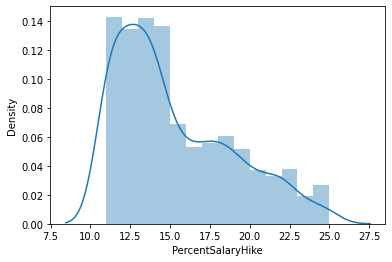

In [926]:
sns.distplot(df['PercentSalaryHike'])

skewness present.

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

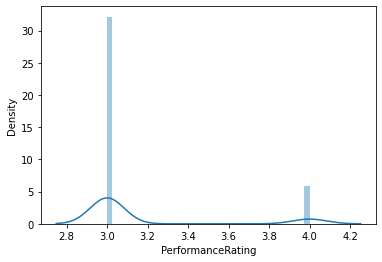

In [927]:
sns.distplot(df['PerformanceRating'])

skewness present.

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

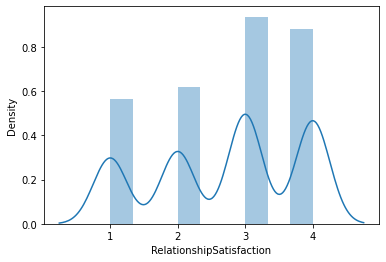

In [928]:
sns.distplot(df['RelationshipSatisfaction'])

No skewness present.

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

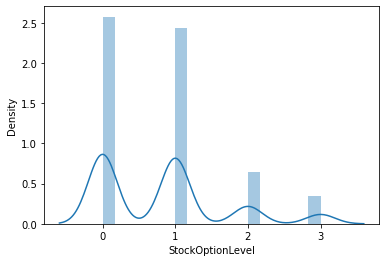

In [929]:
sns.distplot(df['StockOptionLevel'])

skewness present.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

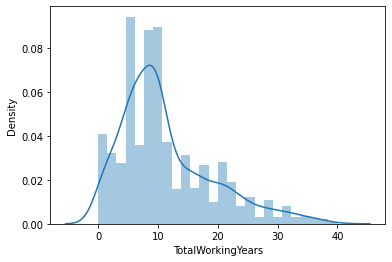

In [930]:
sns.distplot(df['TotalWorkingYears'])

skewness present.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

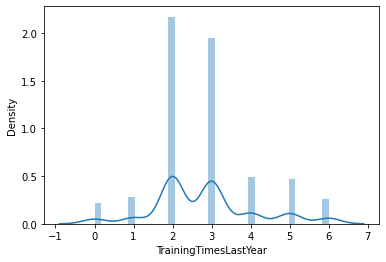

In [931]:
sns.distplot(df['TrainingTimesLastYear'])

No skewness present.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

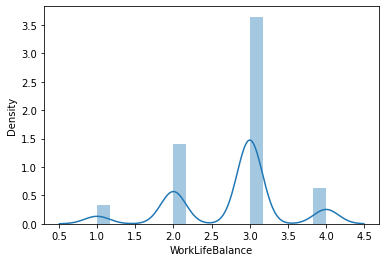

In [932]:
sns.distplot(df['WorkLifeBalance'])

No skewness present.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

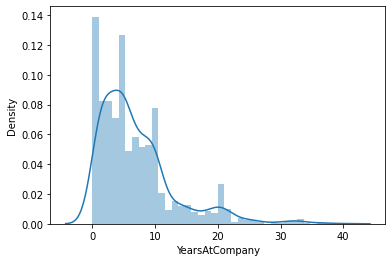

In [933]:
sns.distplot(df['YearsAtCompany'])

skewness present.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

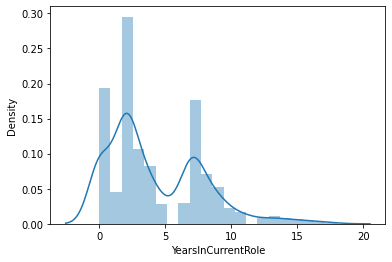

In [934]:
sns.distplot(df['YearsInCurrentRole'])

skewness present.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

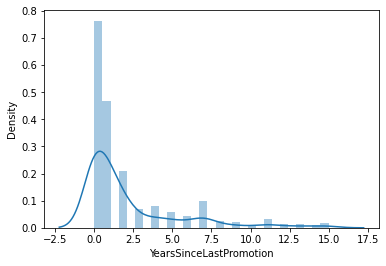

In [935]:
sns.distplot(df['YearsSinceLastPromotion'])

skewness present.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

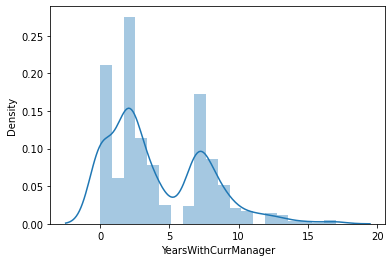

In [936]:
sns.distplot(df['YearsWithCurrManager'])

skewness present.

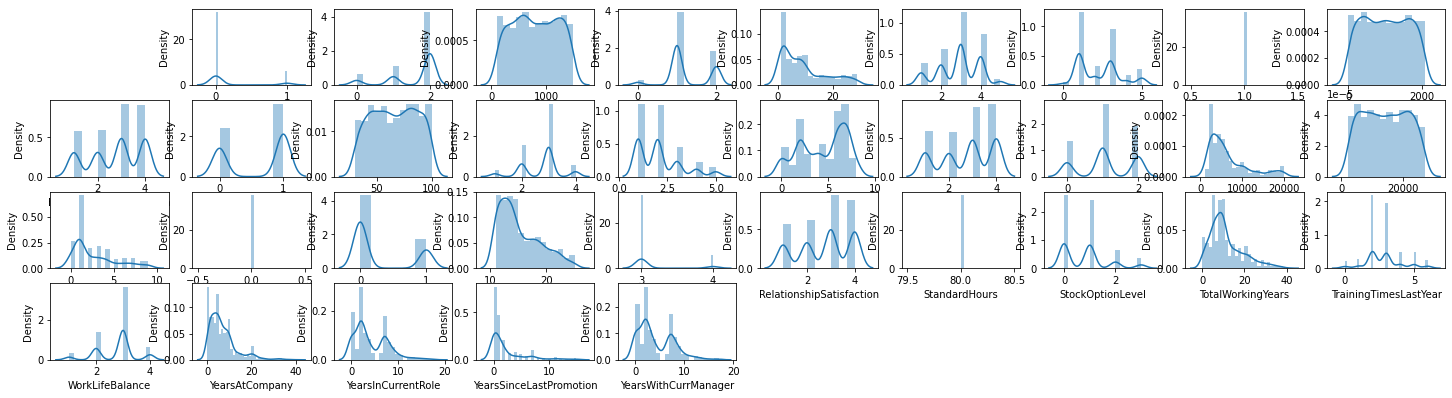

In [937]:
collist=df.columns.values
ncol=10
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [938]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

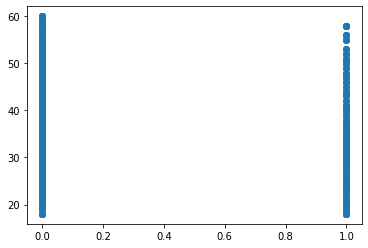

In [939]:
plt.scatter(df['Attrition'],df['Age'])

Age is scattered from 20 to 60.

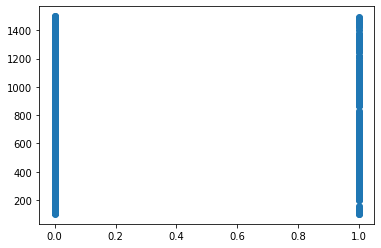

In [940]:
plt.scatter(df['Attrition'],df['DailyRate'])

Daily rate is spreaded from 200 to 1500.

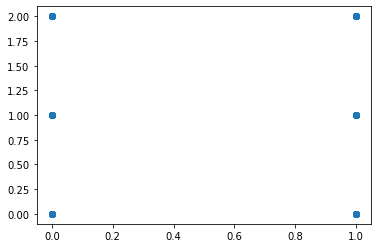

In [941]:
plt.scatter(df['Attrition'],df['BusinessTravel'])

Business Travel is in 0,1 and 2 Range.

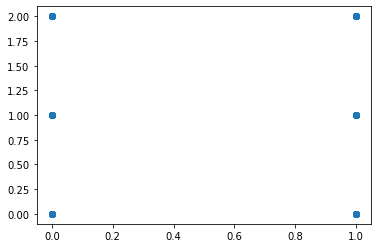

In [942]:
plt.scatter(df['Attrition'],df['Department'])

Department is in 0,1 and 2 Range.

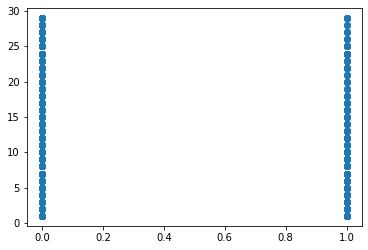

In [943]:
plt.scatter(df['Attrition'],df['DistanceFromHome'])

DistanceFromHome is started from 0 to 30 range.

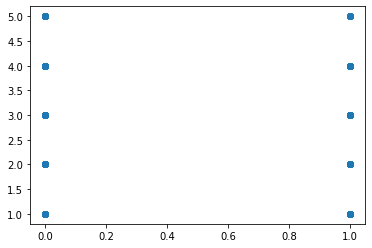

In [944]:
plt.scatter(df['Attrition'],df['Education'])

Education is in 1,2,3,4,5 Range.

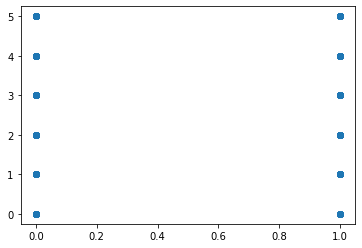

In [945]:
plt.scatter(df['Attrition'],df['EducationField'])

EducationField is in 1,2,3,4,5 range.

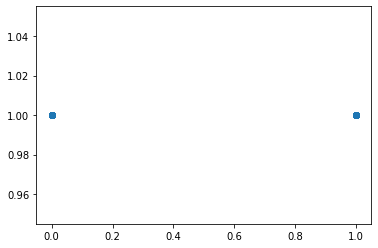

In [946]:
plt.scatter(df['Attrition'],df['EmployeeCount'])

Employee count in the range of 1 only

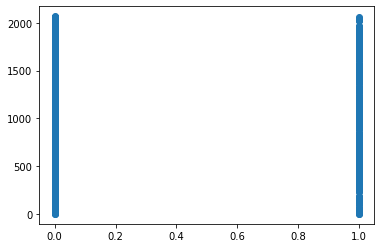

In [947]:
plt.scatter(df['Attrition'],df['EmployeeNumber'])

EmployeeNumber spreaded from 0 to 2000 range.

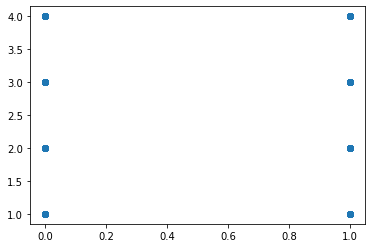

In [948]:
plt.scatter(df['Attrition'],df['EnvironmentSatisfaction'])

EnvironmentSatisfaction is in the range of 1,2,3,4.

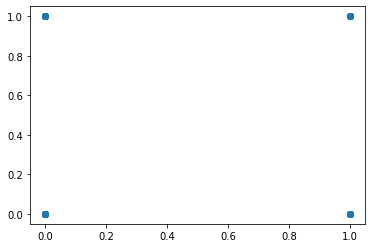

In [949]:
plt.scatter(df['Attrition'],df['Gender'])

Gender has 0 and 1 range.

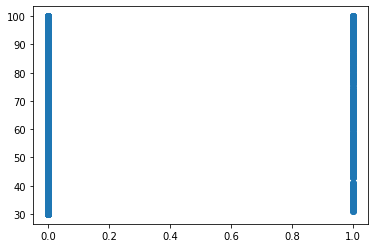

In [950]:
plt.scatter(df['Attrition'],df['HourlyRate'])

HourlyRate is spreaded from 30 to 100 range.

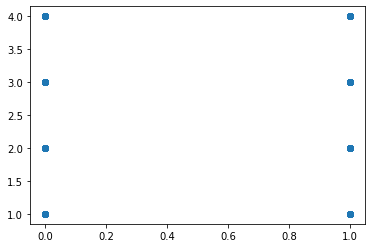

In [951]:
plt.scatter(df['Attrition'],df['JobInvolvement'])

JobInvolvement has 1,2,3,4 range.

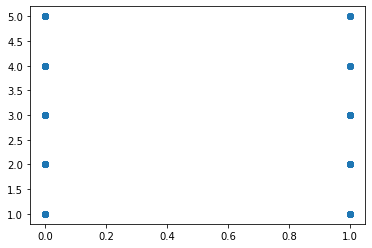

In [952]:
plt.scatter(df['Attrition'],df['JobLevel'])

JobLevel is in 1,2,3,4,5 range.

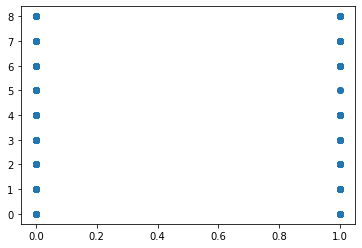

In [953]:
plt.scatter(df['Attrition'],df['JobRole'])

JobRole has 1 to 8 range. 

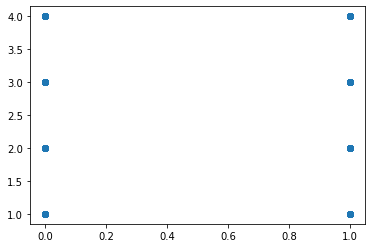

In [954]:
plt.scatter(df['Attrition'],df['JobSatisfaction'])

JobSatisfaction has 1,2,3,4 range.

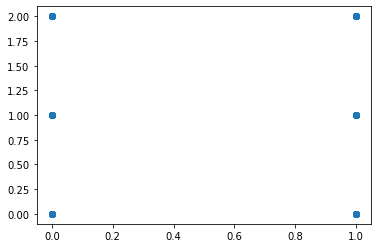

In [955]:
plt.scatter(df['Attrition'],df['MaritalStatus'])

MaritalStatus has 0,1,2 range.

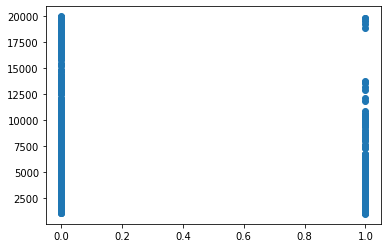

In [956]:
plt.scatter(df['Attrition'],df['MonthlyIncome'])

MonthlyIncome has 0 to 20000 range.

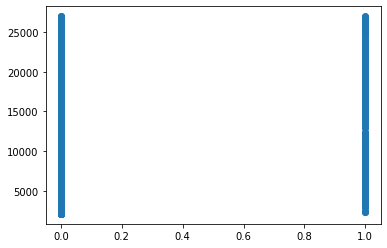

In [957]:
plt.scatter(df['Attrition'],df['MonthlyRate'])

MonthlyRate has 0 to 30000 range.

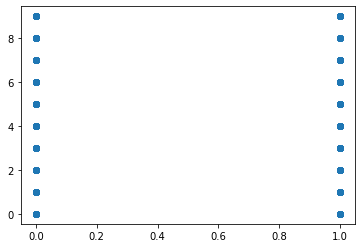

In [958]:
plt.scatter(df['Attrition'],df['NumCompaniesWorked'])

NumCompaniesWorked has 0 to 8 range.

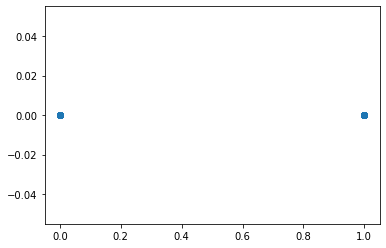

In [959]:
plt.scatter(df['Attrition'],df['Over18'])

Over18 has 0 range only.

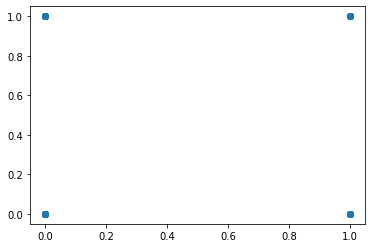

In [960]:
plt.scatter(df['Attrition'],df['OverTime'])

OverTime has 0 and 1 range.

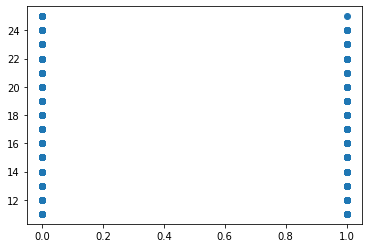

In [961]:
plt.scatter(df['Attrition'],df['PercentSalaryHike'])

PercentSalaryHike has 0 to 24 range.

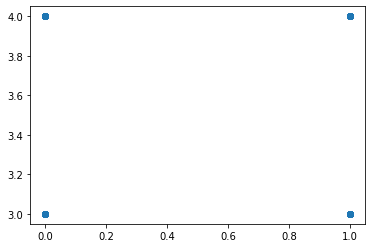

In [962]:
plt.scatter(df['Attrition'],df['PerformanceRating'])

PerformanceRating has only 3 and 4 range.

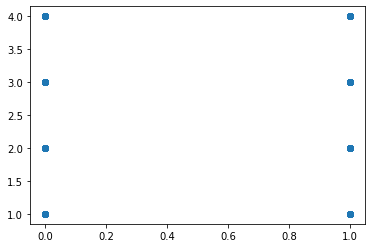

In [963]:
plt.scatter(df['Attrition'],df['RelationshipSatisfaction'])

RelationshipSatisfaction has 1,2,3,4 range.

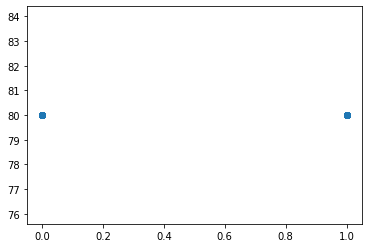

In [964]:
plt.scatter(df['Attrition'],df['StandardHours'])

StandardHours has only 80 range.

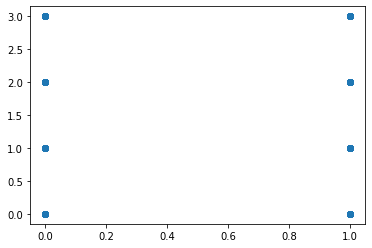

In [965]:
plt.scatter(df['Attrition'],df['StockOptionLevel'])

StockOptionLevel has 0,1,2,3 range.

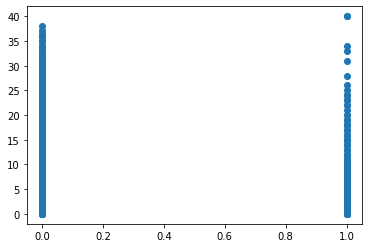

In [966]:
plt.scatter(df['Attrition'],df['TotalWorkingYears'])

TotalWorkingYears has 0 to 40 range.

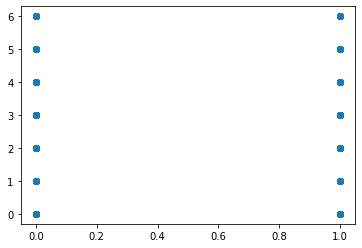

In [967]:
plt.scatter(df['Attrition'],df['TrainingTimesLastYear'])

TrainingTimesLastYear has 0 to 6 range.

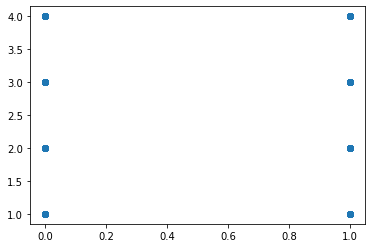

In [968]:
plt.scatter(df['Attrition'],df['WorkLifeBalance'])

WorkLifeBalance has 1,2,3,4 range.

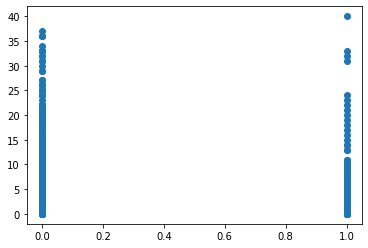

In [969]:
plt.scatter(df['Attrition'],df['YearsAtCompany'])

YearsAtCompany has 0 to 35 range.

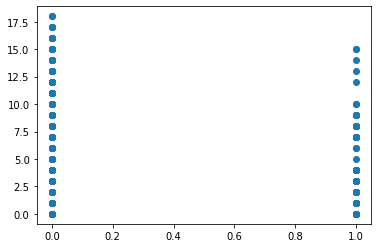

In [970]:
plt.scatter(df['Attrition'],df['YearsInCurrentRole'])

YearsInCurrentRole has 0 to 18 range.

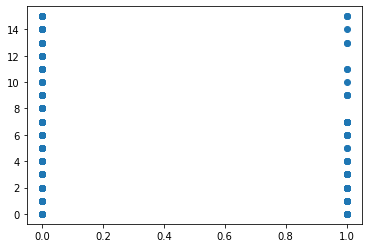

In [971]:
plt.scatter(df['Attrition'],df['YearsSinceLastPromotion'])

YearsSinceLastPromotion has 0 to 15 range.

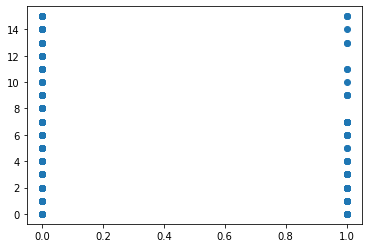

In [972]:
plt.scatter(df['Attrition'],df['YearsSinceLastPromotion'])

YearsSinceLastPromotion has 0 to 14 range.

In [973]:
#sns.pairplot(df)

In [974]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

skewness present in BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.         

# Removing Skewness

In [975]:
df['BusinessTravel']=np.log1p(df['BusinessTravel'])

In [976]:
df['DistanceFromHome']=np.log1p(df['DistanceFromHome'])

In [977]:
df['JobLevel']=np.log1p(df['JobLevel'])

In [978]:
df['MonthlyIncome']=np.log1p(df['MonthlyIncome'])

In [979]:
df['NumCompaniesWorked']=np.log1p(df['NumCompaniesWorked'])

In [980]:
df['OverTime']=np.log1p(df['OverTime'])

In [981]:
df['PercentSalaryHike']=np.log1p(df['PercentSalaryHike'])

In [982]:
df['PerformanceRating']=np.log1p(df['PerformanceRating'])

In [983]:
df['StockOptionLevel']=np.log1p(df['StockOptionLevel'])

In [984]:
df['TotalWorkingYears']=np.log1p(df['TotalWorkingYears'])

In [985]:
df['YearsAtCompany']=np.log1p(df['YearsAtCompany'])

In [986]:
df['YearsInCurrentRole']=np.log1p(df['YearsInCurrentRole'])

In [987]:
df['YearsSinceLastPromotion']=np.log1p(df['YearsSinceLastPromotion'])

In [988]:
df['YearsWithCurrManager']=np.log1p(df['YearsWithCurrManager'])

In [989]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.815861
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [990]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:>

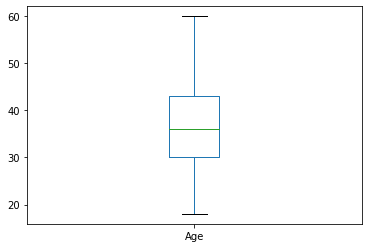

In [991]:
df['Age'].plot.box()

No outliers present.

<AxesSubplot:>

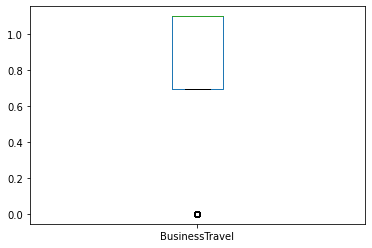

In [992]:
df['BusinessTravel'].plot.box()

outliers present.

<AxesSubplot:>

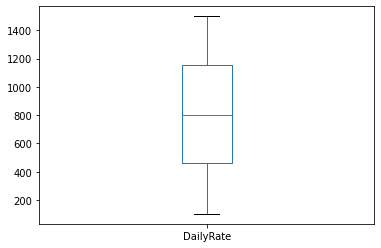

In [993]:
df['DailyRate'].plot.box()

No outliers present.

<AxesSubplot:>

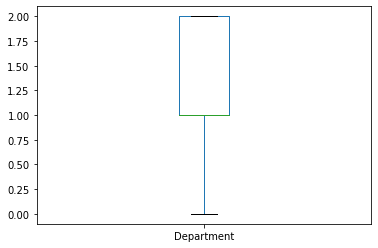

In [994]:
df['Department'].plot.box()

No outliers present.

<AxesSubplot:>

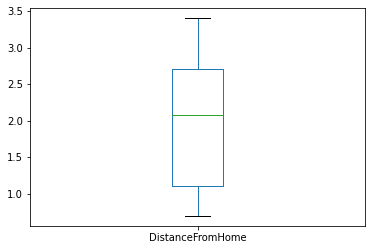

In [995]:
df['DistanceFromHome'].plot.box()

No outliers present.

<AxesSubplot:>

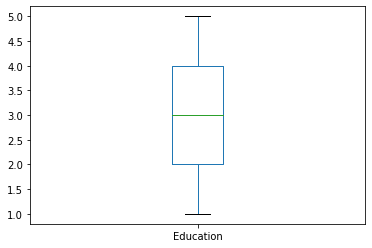

In [996]:
df['Education'].plot.box()

No outliers present.

<AxesSubplot:>

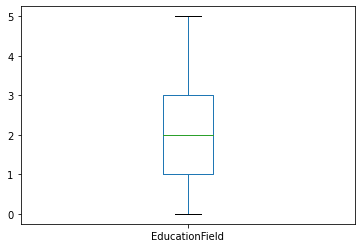

In [997]:
df['EducationField'].plot.box()

No outliers present.

<AxesSubplot:>

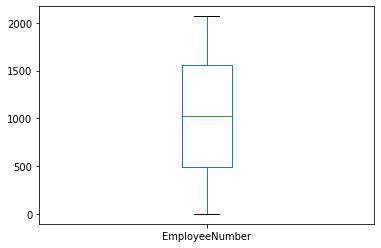

In [998]:
df['EmployeeNumber'].plot.box()

No outliers present.

<AxesSubplot:>

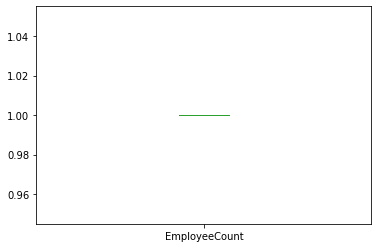

In [999]:
df['EmployeeCount'].plot.box()

No outliers present.

<AxesSubplot:>

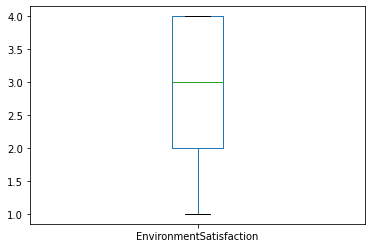

In [1000]:
df['EnvironmentSatisfaction'].plot.box()

No outliers present.

<AxesSubplot:>

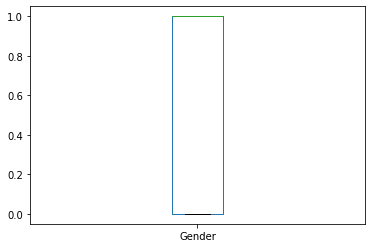

In [1001]:
df['Gender'].plot.box()

No outliers present.

<AxesSubplot:>

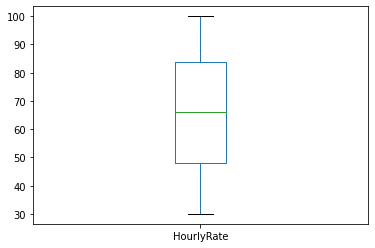

In [1002]:
df['HourlyRate'].plot.box()

No outliers present.

<AxesSubplot:>

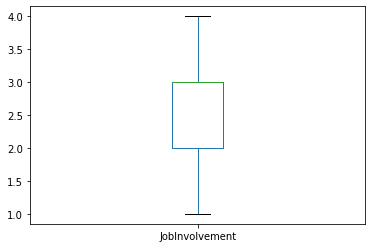

In [1003]:
df['JobInvolvement'].plot.box()

No outliers present.

<AxesSubplot:>

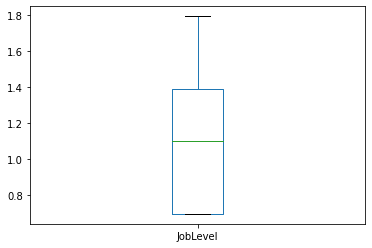

In [1004]:
df['JobLevel'].plot.box()

No outliers present.

<AxesSubplot:>

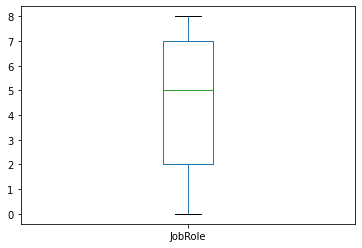

In [1005]:
df['JobRole'].plot.box()

No outliers present.

<AxesSubplot:>

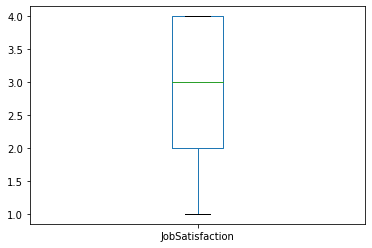

In [1006]:
df['JobSatisfaction'].plot.box()

No outliers present.

<AxesSubplot:>

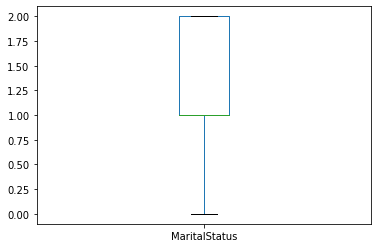

In [1007]:
df['MaritalStatus'].plot.box()

No outliers present.

<AxesSubplot:>

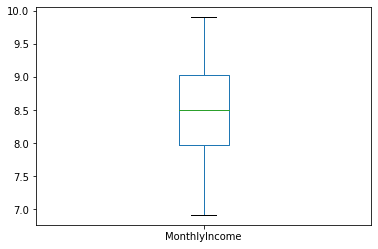

In [1008]:
df['MonthlyIncome'].plot.box()

No outliers present.

<AxesSubplot:>

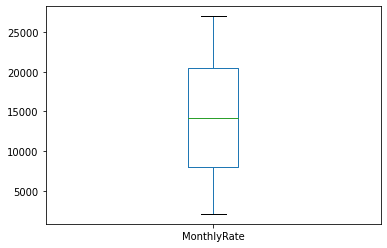

In [1009]:
df['MonthlyRate'].plot.box()

No outliers present.

<AxesSubplot:>

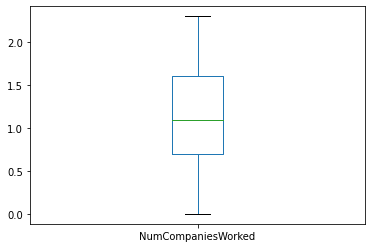

In [1010]:
df['NumCompaniesWorked'].plot.box()

No outliers present.

<AxesSubplot:>

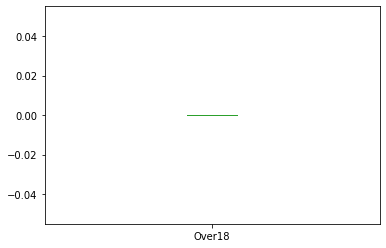

In [1011]:
df['Over18'].plot.box()

No outliers present.

<AxesSubplot:>

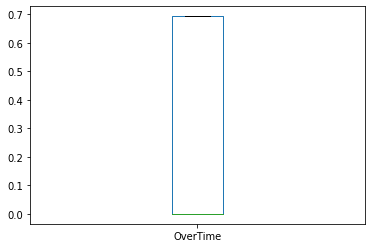

In [1012]:
df['OverTime'].plot.box()

No outliers present.

<AxesSubplot:>

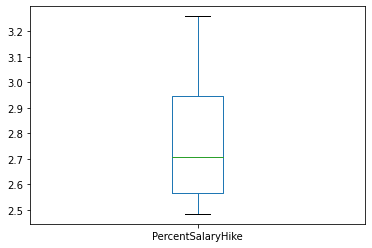

In [1013]:
df['PercentSalaryHike'].plot.box()

No outliers present.

<AxesSubplot:>

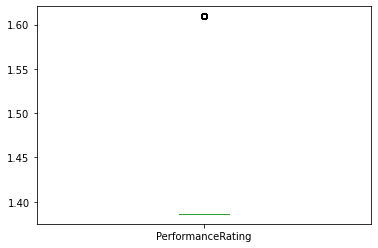

In [1014]:
df['PerformanceRating'].plot.box()

outliers present.

<AxesSubplot:>

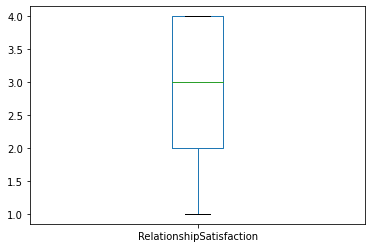

In [1015]:
df['RelationshipSatisfaction'].plot.box()

No outliers present.

<AxesSubplot:>

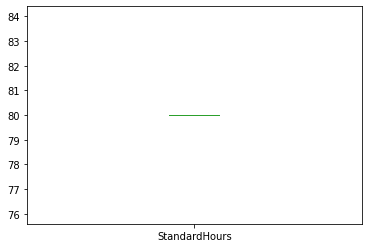

In [1016]:
df['StandardHours'].plot.box()

No outliers present.

<AxesSubplot:>

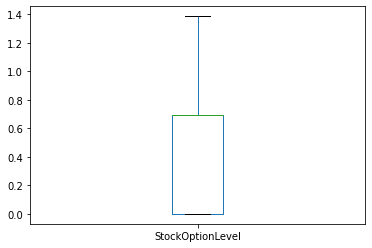

In [1017]:
df['StockOptionLevel'].plot.box()

No outliers present.

<AxesSubplot:>

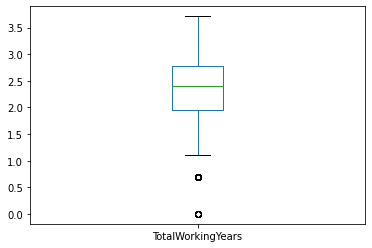

In [1018]:
df['TotalWorkingYears'].plot.box()

 outliers present.

<AxesSubplot:>

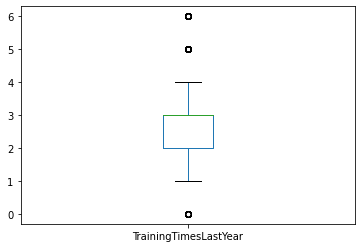

In [1019]:
df['TrainingTimesLastYear'].plot.box()

 outliers present.

<AxesSubplot:>

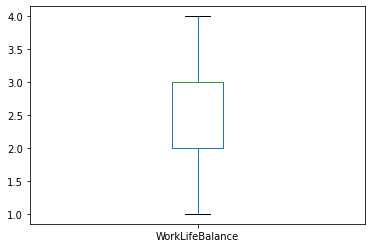

In [1020]:
df['WorkLifeBalance'].plot.box()

No outliers present.

<AxesSubplot:>

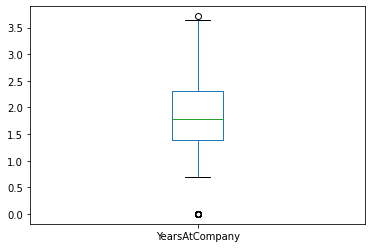

In [1021]:
df['YearsAtCompany'].plot.box()

outliers present.

<AxesSubplot:>

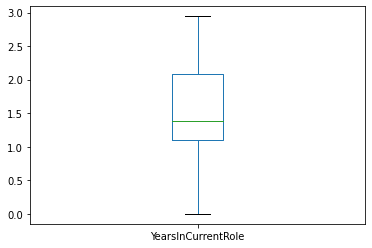

In [1022]:
df['YearsInCurrentRole'].plot.box()

No outliers present.

<AxesSubplot:>

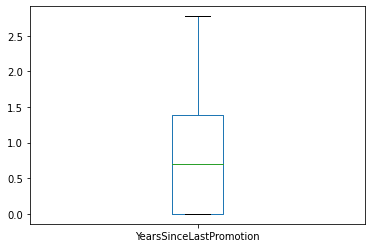

In [1023]:
df['YearsSinceLastPromotion'].plot.box()

No outliers present.

<AxesSubplot:>

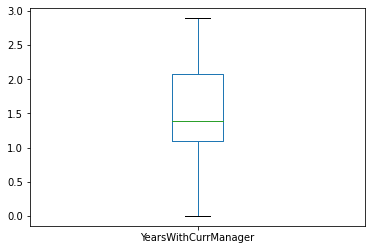

In [1024]:
df['YearsWithCurrManager'].plot.box()

No outliers present.

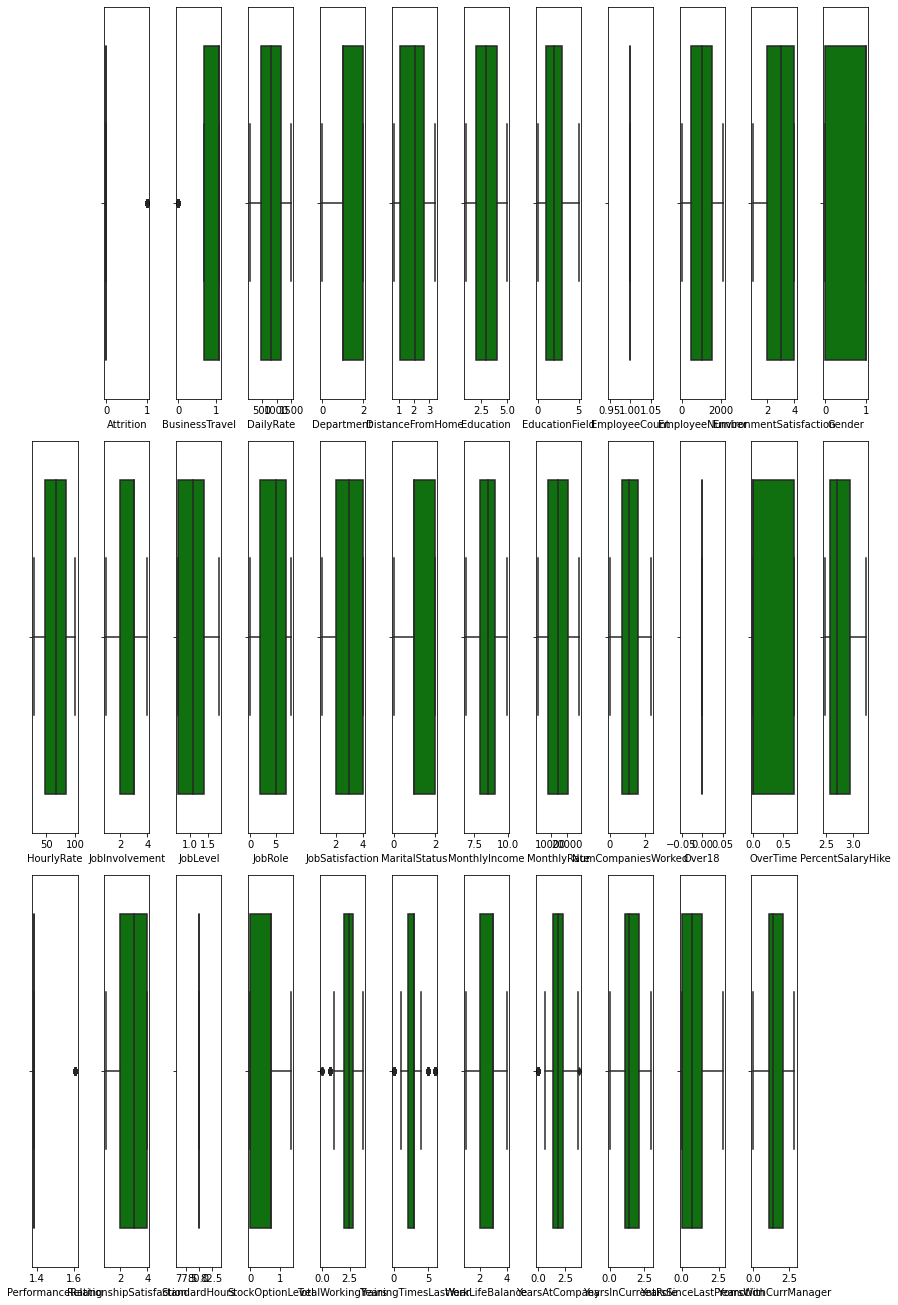

In [1026]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [1027]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Removing Outliers

In [1029]:
from scipy.stats import zscore
z=np.abs(zscore(df[['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
                  'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
                  'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]))
print(np.where(z>3))

(array([  23,  127,  296,  301,  457,  615,  727,  828,  972, 1153, 1311],
      dtype=int64), array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], dtype=int64))


In [1030]:
z[127][19]

3.285032383741204

In [1031]:
z[23][19]

3.285032383741204

In [1032]:
df1=df[(z<3).all(axis=1)]

In [1033]:
df1.shape

(0, 35)

In [1034]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1.098612,1102,2,0.693147,2,1,1,1,...,1,80,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,1.791759
1,49,0,0.693147,279,1,2.197225,1,1,1,2,...,4,80,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,2.079442
2,37,1,1.098612,1373,1,1.098612,2,4,1,4,...,2,80,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0.000000
3,33,0,0.693147,1392,1,1.386294,4,1,1,5,...,3,80,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0.000000
4,27,0,1.098612,591,1,1.098612,1,3,1,7,...,4,80,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,1.098612


In [1035]:
df.shape

(1470, 35)

In [1036]:
df.drop('Age',axis=1,inplace=True)

In [1037]:
x=df.iloc[:,1:36]
y=df.iloc[:,0]



In [1038]:
x

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.098612,1102,2,0.693147,2,1,1,1,2,0,...,1,80,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,1.791759
1,0.693147,279,1,2.197225,1,1,1,2,3,1,...,4,80,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,2.079442
2,1.098612,1373,1,1.098612,2,4,1,4,4,1,...,2,80,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0.000000
3,0.693147,1392,1,1.386294,4,1,1,5,4,0,...,3,80,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0.000000
4,1.098612,591,1,1.098612,1,3,1,7,1,1,...,4,80,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.693147,884,1,3.178054,2,3,1,2061,3,1,...,3,80,0.693147,2.890372,3,3,1.791759,1.098612,0.000000,1.386294
1466,1.098612,613,1,1.945910,1,3,1,2062,4,1,...,1,80,0.693147,2.302585,5,3,2.079442,2.079442,0.693147,2.079442
1467,1.098612,155,1,1.609438,3,1,1,2064,2,1,...,2,80,0.693147,1.945910,0,3,1.945910,1.098612,0.000000,1.386294
1468,0.693147,1023,2,1.098612,3,3,1,2065,4,1,...,4,80,0.000000,2.890372,3,2,2.302585,1.945910,0.000000,2.197225


In [1039]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [1040]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= accuracy_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [1041]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LogisticRegression()
dt=DecisionTreeClassifier()


list=[lr,dt]

for var in list:
    print(var)
    get_score(var)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
max score 0.9135802469135802
max i 123
[[410   5]
 [ 56  15]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       415
           1       0.75      0.21      0.33        71

    accuracy                           0.87       486
   macro avg       0.81      0.60      0.63       486
weighted avg       0.86      0.87      0.84       486

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
        

# AUC ROC CURVE¶

In [1042]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [1043]:
y_pred_prob=dt.predict_proba(x_test)[:,0]

In [1044]:
y_pred_prob

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

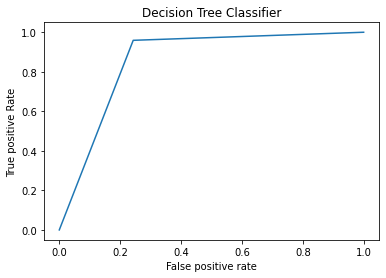

0.8581387362637363

In [1045]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# cross validation

In [1046]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.57345972 0.81428571 0.75238095 0.77142857 0.76190476 0.78571429
 0.76555024]
0.7463891772269352 0.07302813047387069


In [1047]:

score=cross_val_score(lr,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.84834123 0.84761905 0.86190476 0.88571429 0.87142857 0.88571429
 0.88516746]
0.8694128069604677 0.015852439632356684


# Grid search CV

In [1048]:
grid_param={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,grid_param,scoring='accuracy',cv=5)
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'entropy'}
0.789795918367347


logistic regression is the best model as the difference between crossvalidation score and model is least.

# Saving the model

In [1049]:
import joblib
joblib.dump(lr,'HR.obj')

['HR.obj']

In [1050]:
file=joblib.load('HR.obj')
file.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,